# Section 1: Data Loading
we should first import our dependency packages. You should first **RUN** this code block.

In [3]:
from scipy.io import loadmat
from pylab import * 
from math import sqrt
import numpy as np
import pandas as pd

Then we load our dataset from **EEG_P2090_processed.mat ** file

In [4]:
data = loadmat('D:/computational_neuroscience/EEG_P2090_processed.mat')

# Section 2: Data Overview
This section is dedicated to providing a comprehensive breakdown of crucial information extracted 
and displayed for EEG data analysis. An understanding of these fundamental data characteristics 
is vital for any EEG research or analysis. Here's a detailed explanation of the information that must 
be extracted and displayed in this code section:

In [3]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])


Then we calculate these values:
- Number of Channels
- Sample Time (Number of Samples)
- Sampling Frequency (Fs)
- Duration of the Recording (in Seconds)
- Duration of the Recording (in Minutes)

In [8]:
Number_of_Channels = data['EEG_P2090_processed'].shape[0]
print(f'The number of channels is {Number_of_Channels}')

Number_of_Samples = data['EEG_P2090_processed'].shape[1]
print(f'The number of samples is {Number_of_Samples}')

Sampling_Frequency = 500 #Hz
Sample_Time = 1 / Sampling_Frequency
print(f'The sample time is {Sample_Time}')

Duration_of_Recording = Number_of_Samples * Sample_Time
print(f'The duration of the EEG recording is {Duration_of_Recording} seconds')
print(f'The duration of the EEG recording is {Duration_of_Recording/60} minutes')


The number of channels is 29
The number of samples is 150310
The sample time is 0.002
The duration of the EEG recording is 300.62 seconds
The duration of the EEG recording is 5.0103333333333335 minutes


# Section 3: EEG Data Visualization (Interactive)
We will create an interactive visualization tool to allow users to select and 
visualize EEG (Electroencephalogram) data from a specified channel within a loaded dataset. This 
exercise provides hands-on experience in creating interactive data visualizations for EEG analysis.

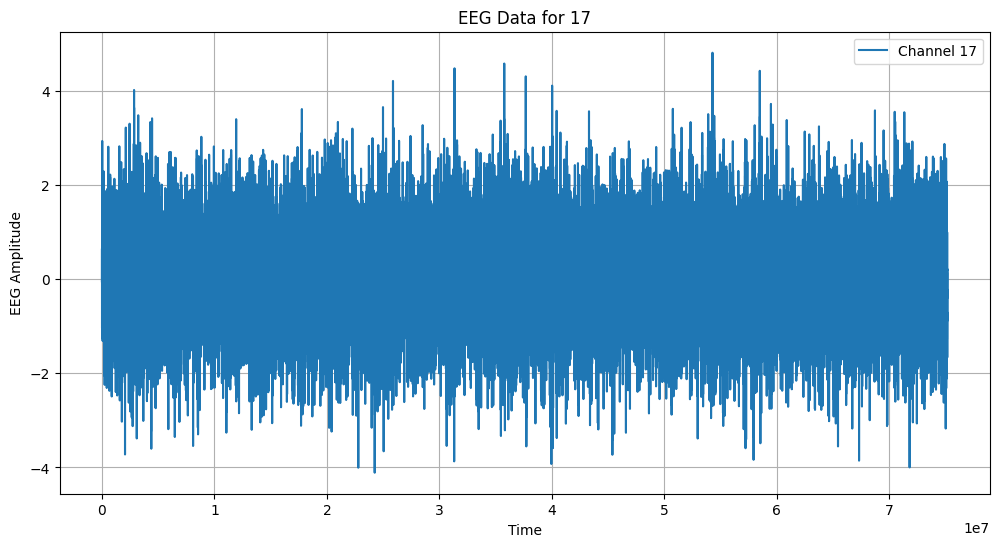

In [9]:
channel_input = int(input('please enter a channel: '))

EEG = data['EEG_P2090_processed']

# Determine the number of channels and time points
num_channels, num_time_points = EEG.shape

# Create a time array based on the sample time & the number of time points
time = np.arange(num_time_points) / Sample_Time

# Plot the EEG channel

#creates a new figure with a specified size of 12 inches by 6 inches
plt.figure(figsize=(12, 6))
#plots the EEG data for a given channel as a function of time. 
#The channel_input is a variable that stores the channel number that the user wants to see.
#The label argument assigns a name to the plot that will be shown in the legend.
plt.plot(time, EEG[channel_input, :], label=f'Channel {channel_input}')

#sets the title of the plot as EEG Data for the channel number.
plt.title(f'EEG Data for {channel_input}')
#sets the label of the x-axis as Time.
plt.xlabel('Time')
#sets the label of the y-axis as EEG Amplitude.
plt.ylabel('EEG Amplitude')
#adds a legend to the plot that shows the names of the plots.
plt.legend()
#adds a grid to the plot that makes it easier to see the values.
plt.grid(True)
#displays the plot on the screen.
plt.show()


# Section 4: Data Segmentation
We will create a code section that calculates and displays the mean and standard 
deviation of EEG (Electroencephalogram) values for a specified time segment within the loaded 
EEG data.

In [10]:
start_time , end_time = [int(x) for x in input("Please enter the start & end times (seconds): ").split()]
#creates a numpy array of numbers from start_time to end_time, with a step of 1.
time_input = np.arange( start_time , end_time ) 
# extracts a segment of the EEG data from the start_time index to the end_time index. 
EEG_segment = EEG[start_time:end_time]
mean = np.mean(EEG_segment) 
std = np.std(EEG_segment)
print(f"The mean of the EEG values for the time segment is {mean} microvolts.") 
print(f"The standard deviation of the EEG values for the time segment is {std} microvolts.")

The mean of the EEG values for the time segment is 5.3606533674505413e-05 microvolts.
The standard deviation of the EEG values for the time segment is 0.8151715154397962 microvolts.


# Section 5: Export Statistics
Our aim is to create a code section that calculates and exports important statistics, 
including the mean, standard deviation, median, and range of EEG (Electroencephalogram) values. 
The statistics are computed for a specific time segment and channel within the EEG data. You will 
also export this statistical information to a CSV file for future analysis and reference.

In [11]:
'''calculates the mean of the EEG values for a given channel and a given time segment. 
The channel_input is a variable that stores the channel number that the user wants to see. 
The start_time and end_time are variables that store the start and end times in seconds that the user wants to see. 
The EEG is a numpy array that stores the EEG data. 
The EEG[channel_input, :] selects the row of the array that corresponds to the channel number. 
The [start_time:end_time] selects the segment of the row that corresponds to the time interval. 
The mean() method computes the mean of the selected segment'''
EEG_mean = EEG[channel_input, :][start_time:end_time].mean()
print(f"The mean of EEG is: {EEG_mean}")

EEG_standard_deviation = EEG[channel_input, :][start_time:end_time].std()
print(f"The standard deviation of EEG is: {EEG_standard_deviation}")

EEG_median = np.median(EEG[channel_input, :][start_time:end_time])
print(f"The median of EEG is: {EEG_median}")
'''assigns the selected segment of EEG values to a variable called EEG_range.'''
EEG_range = EEG[channel_input, :][start_time:end_time]
EEG_range.sort()
print(f"The range of EEG is: {EEG_range}")


#creates a list of four variables that store the mean, standard deviation, median, and range of the EEG values for a given channel and time segment.
data_frame_list = [EEG_mean, EEG_standard_deviation, EEG_median, EEG_range] 
#creates a data frame from the list using the pandas library. 
#The data frame has four columns named Mean, STD, MEDIAN, and EEG_RANGE, and one row that contains the values of the variables.
df = pd.DataFrame({
    "Mean": [EEG_mean],
    "STD": [EEG_standard_deviation],
    "MEDIAN": [EEG_median],
    "EEG_RANGE": [EEG_range]
}) 
print(df)

df.to_csv('D:\\computational_neuroscience\\EEG.csv', sep = ",")

The mean of EEG is: 0.05397111676877389
The standard deviation of EEG is: 0.4763200420787875
The median of EEG is: 0.12849636314617785
The range of EEG is: [-0.90055285 -0.70542    -0.41548052 -0.05642455  0.0778146   0.10237221
  0.15462052  0.30185908  0.3387504   0.54352909  0.56180846  0.64477695]
       Mean      STD    MEDIAN  \
0  0.053971  0.47632  0.128496   

                                           EEG_RANGE  
0  [-0.9005528504133605, -0.7054199960082771, -0....  
